In [9]:
from IPython.display import Image, display

display(Image(url=image_url))


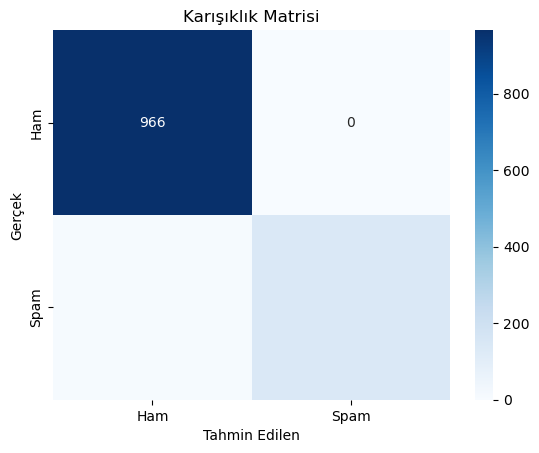

              precision    recall  f1-score   support

         ham       0.99      1.00      1.00       966
        spam       1.00      0.94      0.97       149

    accuracy                           0.99      1115
   macro avg       1.00      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report

# Veriyi yükleme
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/sms.tsv"
df = pd.read_csv(url, sep='\t', header=None)
df.columns = ['label', 'message']

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42)

# Metin verisini sayısal verilere dönüştürme
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

# Modeli eğitme
model = MultinomialNB()
model.fit(X_train_counts, y_train)

# Tahmin yapma
y_pred = model.predict(X_test_counts)

# Karışıklık matrisini hesaplama
conf_matrix = confusion_matrix(y_test, y_pred)

# Karışıklık matrisini görselleştirme
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title('Karışıklık Matrisi')
plt.show()

# Sınıflandırma raporu
print(classification_report(y_test, y_pred))


In [3]:
pip install pandas matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd

# Veriyi yükleme
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/sms.tsv"
df = pd.read_csv(url, sep='\t', header=None)
df.columns = ['label', 'message']

# İlk birkaç satırı gözlemleyin
print(df.head())


  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [23]:
import pandas as pd

# Verinin bulunduğu dosya yolunu belirleme
csv_file_path = 'C:/Users/hatice/Downloads/spam.csv'

# Veriyi okuma
df = pd.read_csv(csv_file_path, encoding='latin1')

# Gereksiz sütunları kaldırma
df = df[['v1', 'v2']]
df.columns = ['Label', 'Message']

# Tüm satırları ve sütunları göstermek için ayarları yapma
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)

# Sonuçları görüntüleme
df.head(50)  # İlk 50 satırı görüntüler

from IPython.display import display, HTML

# Compact ve hem yatay hem dikey kaydırılabilir tabloyu oluşturma
html_code = '''
<div style="overflow-x: auto; overflow-y: auto; width: 100%; height: 400px; border: 1px solid #ddd; padding: 10px;">
    {table}
</div>
'''.format(table=df.to_html(index=False, justify='left', max_cols=None, max_rows=None))

display(HTML(html_code))



Label,Message
ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
ham,Ok lar... Joking wif u oni...
spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
ham,U dun say so early hor... U c already then say...
ham,"Nah I don't think he goes to usf, he lives around here though"
spam,"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv"
ham,Even my brother is not like to speak with me. They treat me like aids patent.
ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
spam,WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.
spam,Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030


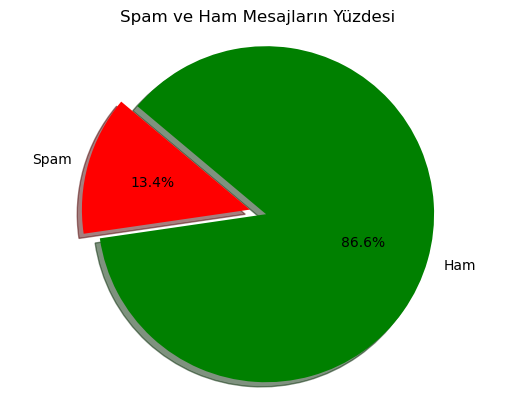

In [9]:
import matplotlib.pyplot as plt

# Yüzde hesaplama
spam_count = df[df['label'] == 'spam'].shape[0]
ham_count = df[df['label'] == 'ham'].shape[0]

# Pasta grafiği
labels = 'Spam', 'Ham'
sizes = [spam_count, ham_count]
colors = ['red', 'green']
explode = (0.1, 0)  # Spami biraz öne çıkar

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Daireyi düzgün hale getir
plt.title('Spam ve Ham Mesajların Yüzdesi')
plt.show()


In [11]:
# Güç tüketimi (Watt cinsinden)
# Örnek olarak, bir mobil cihazın 2G/3G şebekesi üzerinden ortalama güç tüketimi
power_consumption = 0.5  # 0.5 Watt olarak varsayıyoruz (ortalama bir değer)

# SMS gönderme süresi (saniye cinsinden)
# Bir SMS gönderme süresi genellikle çok kısa, bu süreyi tahmini olarak 2 saniye alıyoruz
time_to_send_sms = 2  # 2 saniye

# Enerji tüketimi hesaplama (Joule cinsinden)
# Enerji = Güç (Watt) * Zaman (saniye)
energy_consumption = power_consumption * time_to_send_sms

print(f"Bir SMS mesajını göndermek için kullanılan enerji: {energy_consumption} Joule")


Bir SMS mesajını göndermek için kullanılan enerji: 1.0 Joule


In [13]:
import pandas as pd

# Veriyi yükleme
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/sms.tsv"
df = pd.read_csv(url, sep='\t', header=None)
df.columns = ['label', 'message']

# Spam ve ham mesajların sayısını bulma
spam_count = df[df['label'] == 'spam'].shape[0]
ham_count = df[df['label'] == 'ham'].shape[0]

# Sonuçları ekrana yazdırma
print(f"Spam mesaj sayısı: {spam_count}")
print(f"Ham mesaj sayısı: {ham_count}")


Spam mesaj sayısı: 747
Ham mesaj sayısı: 4825


Dünyada SMS alabilen insanlar yılda yaklaşık 3735000000000 Joule enerjiyi spam mesajlar nedeniyle israf ediyor.


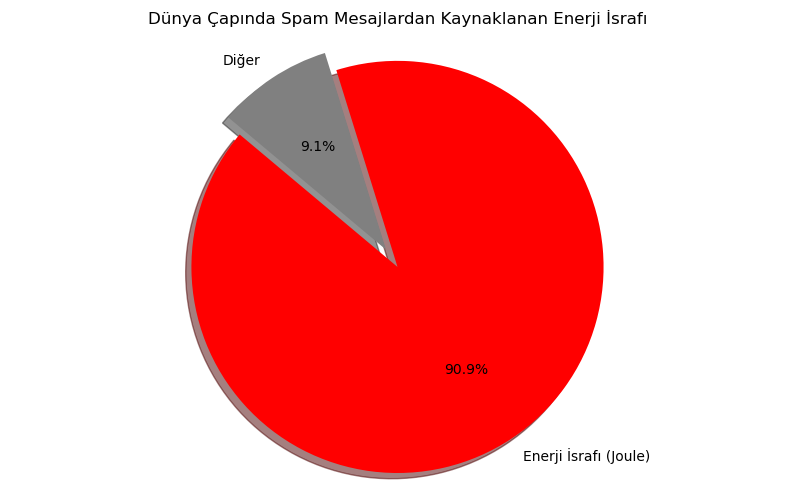

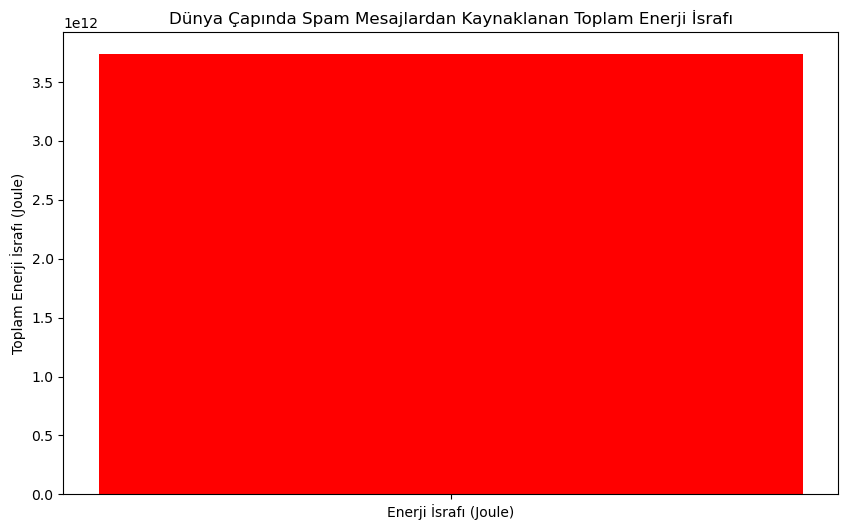

In [15]:
import matplotlib.pyplot as plt

# Verilen sabitler
average_spam_messages_per_person = 747  # Her insanın yılda aldığı spam mesaj sayısı
energy_wasted_per_message = 1  # Her bir spam mesajı için harcanan enerji (Joule)
world_population_receiving_sms = 5_000_000_000  # SMS alabilen insan sayısı (yaklaşık)

# Toplam enerji israfını hesaplama
total_energy_wasted = average_spam_messages_per_person * energy_wasted_per_message * world_population_receiving_sms

# Sonuçları ekrana yazdırma
print(f"Dünyada SMS alabilen insanlar yılda yaklaşık {total_energy_wasted} Joule enerjiyi spam mesajlar nedeniyle israf ediyor.")

# Şematik ve Grafiklerle Görselleştirme
labels = ['Enerji İsrafı (Joule)', 'Diğer']
sizes = [total_energy_wasted, total_energy_wasted * 0.1]  # Görselleştirme için diğer enerjiyi de ekledik
colors = ['red', 'gray']
explode = (0.1, 0)  # Enerji israfını vurgulamak için

# Pasta grafiği
plt.figure(figsize=(10, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Daireyi düzgün hale getirme
plt.title('Dünya Çapında Spam Mesajlardan Kaynaklanan Enerji İsrafı')
plt.show()

# Enerji israfını bar grafikte gösterme
plt.figure(figsize=(10, 6))
plt.bar(['Enerji İsrafı (Joule)'], [total_energy_wasted], color='red')
plt.ylabel('Toplam Enerji İsrafı (Joule)')
plt.title('Dünya Çapında Spam Mesajlardan Kaynaklanan Toplam Enerji İsrafı')
plt.show()


In [17]:
# Verilen sabitler
average_spam_messages_per_person = 747  # Her insanın yılda aldığı spam mesaj sayısı
energy_wasted_per_message = 1  # Her bir spam mesajı için harcanan enerji (Joule)
world_population_receiving_sms = 5_000_000_000  # SMS alabilen insan sayısı (yaklaşık)

# Toplam enerji israfını hesaplama
total_energy_wasted = average_spam_messages_per_person * energy_wasted_per_message * world_population_receiving_sms

# Cihazların enerji tüketimi
led_bulb_power = 10  # 10W
fridge_power = 200  # Ortalama 200W
oven_power = 2000  # 2000W (2 kW)

# Enerji israfını kWh cinsine çevirme
total_energy_wasted_kWh = total_energy_wasted / 3_600_000  # Joule to kWh dönüşümü (1 kWh = 3.6 milyon Joule)

# Kıyaslama için saat hesaplamaları
led_bulb_hours = total_energy_wasted_kWh / (led_bulb_power / 1000)  # LED ampulün kaç saat yanabileceği
fridge_hours = total_energy_wasted_kWh / (fridge_power / 1000)  # Buzdolabının kaç saat çalışabileceği
oven_hours = total_energy_wasted_kWh / (oven_power / 1000)  # Fırının kaç saat çalışabileceği

# Sonuçları ekrana yazdırma
print(f"Dünya çapında spam mesajlardan kaynaklanan toplam enerji israfı: {total_energy_wasted} Joule")
print(f"Bu, yaklaşık {total_energy_wasted_kWh:.2f} kWh enerjiye eşdeğer.")
print(f"Bu enerji, 10W bir LED ampulün {led_bulb_hours:.2f} saat boyunca yanmasına eşdeğer.")
print(f"Bu enerji, bir buzdolabının {fridge_hours:.2f} saat boyunca çalışmasına eşdeğer.")
print(f"Bu enerji, bir elektrikli fırının {oven_hours:.2f} saat boyunca çalışmasına eşdeğer.")


Dünya çapında spam mesajlardan kaynaklanan toplam enerji israfı: 3735000000000 Joule
Bu, yaklaşık 1037500.00 kWh enerjiye eşdeğer.
Bu enerji, 10W bir LED ampulün 103750000.00 saat boyunca yanmasına eşdeğer.
Bu enerji, bir buzdolabının 5187500.00 saat boyunca çalışmasına eşdeğer.
Bu enerji, bir elektrikli fırının 518750.00 saat boyunca çalışmasına eşdeğer.


In [1]:
# Verilen saatler
hours_led_bulb = 103750000.00
hours_fridge = 5187500.00
hours_oven = 518750.00

# Saatleri gün cinsine çevirme
days_led_bulb = hours_led_bulb / 24
days_fridge = hours_fridge / 24
days_oven = hours_oven / 24

# Sonuçları yazdırma
print(f"LED ampul: {days_led_bulb} gün")
print(f"Buzdolabı: {days_fridge} gün")
print(f"Elektrikli fırın: {days_oven} gün")


LED ampul: 4322916.666666667 gün
Buzdolabı: 216145.83333333334 gün
Elektrikli fırın: 21614.583333333332 gün


In [3]:
# Verilen saatler
hours_led_bulb = 103750000.00
hours_fridge = 5187500.00
hours_oven = 518750.00

# Saatleri gün cinsine çevirme
days_led_bulb = hours_led_bulb / 24
days_fridge = hours_fridge / 24
days_oven = hours_oven / 24

# Günleri yıl cinsine çevirme (1 yıl = 365 gün)
years_led_bulb = days_led_bulb / 365
years_fridge = days_fridge / 365
years_oven = days_oven / 365

# Sonuçları yazdırma
print(f"LED ampul: {years_led_bulb} yıl")
print(f"Buzdolabı: {years_fridge} yıl")
print(f"Elektrikli fırın: {years_oven} yıl")


LED ampul: 11843.607305936073 yıl
Buzdolabı: 592.1803652968036 yıl
Elektrikli fırın: 59.21803652968036 yıl


In [1]:
# Gerekli veriler
spam_mesaj_sayisi = 747
bir_spam_enerji = 1  # joule
dunya_kullanicisi = 5_000_000_000  # 5 milyar

# Toplam yıllık enerji israfı
yillik_enerji_israfi_joule = dunya_kullanicisi * spam_mesaj_sayisi * bir_spam_enerji

# Enerjiyi saat, yıl ve on yıla çevirme
enerji_saat = yillik_enerji_israfi_joule / 3600  # joule'den watt-saat'e çevir
enerji_yil = enerji_saat / (365 * 24)  # watt-saat'i yıla çevir
enerji_on_yil = enerji_yil * 10  # 10 yıllık enerji

# Ampul, buzdolabı ve fırının çalışma süresiyle karşılaştırma
ampul_watt = 60  # watt
buzdolabi_watt = 150  # watt
firin_watt = 2000  # watt

ampul_saat = enerji_saat / ampul_watt
buzdolabi_saat = enerji_saat / buzdolabi_watt
firin_saat = enerji_saat / firin_watt

# Sonuçları yazdırma
print(f"Yıllık toplam enerji israfı: {yillik_enerji_israfi_joule:.2e} joule")
print(f"Bu enerji: {enerji_saat:.2e} watt-saat")
print(f"Bir ampul bu kadar enerji ile {ampul_saat:.2e} saat yanabilir.")
print(f"Bir buzdolabı bu kadar enerji ile {buzdolabi_saat:.2e} saat çalışabilir.")
print(f"Bir fırın bu kadar enerji ile {firin_saat:.2e} saat çalışabilir.")
print(f"Bu enerji 1 yılda {enerji_yil:.2e} watt-yıl, 10 yılda {enerji_on_yil:.2e} watt-yıl'dır.")

Yıllık toplam enerji israfı: 3.74e+12 joule
Bu enerji: 1.04e+09 watt-saat
Bir ampul bu kadar enerji ile 1.73e+07 saat yanabilir.
Bir buzdolabı bu kadar enerji ile 6.92e+06 saat çalışabilir.
Bir fırın bu kadar enerji ile 5.19e+05 saat çalışabilir.
Bu enerji 1 yılda 1.18e+05 watt-yıl, 10 yılda 1.18e+06 watt-yıl'dır.


In [3]:
# Gerekli veriler
spam_mesaj_sayisi = 747
bir_spam_enerji = 1  # joule
dunya_kullanicisi = 5_000_000_000  # 5 milyar

# Toplam yıllık enerji israfı
yillik_enerji_israfi_joule = dunya_kullanicisi * spam_mesaj_sayisi * bir_spam_enerji
yillik_enerji_israfi_kwh = yillik_enerji_israfi_joule / (3.6 * 10**6)  # joule'den kWh'e çevir

# Enerji karışımı oranları
fosil_yakit_orani = 0.60
komur_orani = 0.40  # fosil yakıtlar arasında
petrol_orani = 0.15
dogal_gaz_orani = 0.05
nukleer_orani = 0.20
yenilenebilir_orani = 0.20

# Karbon salınımı faktörleri (kg CO2/kWh)
komur_karbon_faktor = 0.91
petrol_karbon_faktor = 0.71
dogal_gaz_karbon_faktor = 0.45

# Fosil yakıtların ayrı ayrı hesaplanması
komur_enerji_kwh = yillik_enerji_israfi_kwh * fosil_yakit_orani * komur_orani
petrol_enerji_kwh = yillik_enerji_israfi_kwh * fosil_yakit_orani * petrol_orani
dogal_gaz_enerji_kwh = yillik_enerji_israfi_kwh * fosil_yakit_orani * dogal_gaz_orani

# Karbon salınımlarını hesaplama
komur_karbon_salini = komur_enerji_kwh * komur_karbon_faktor
petrol_karbon_salini = petrol_enerji_kwh * petrol_karbon_faktor
dogal_gaz_karbon_salini = dogal_gaz_enerji_kwh * dogal_gaz_karbon_faktor

# Toplam karbon salınımı
toplam_karbon_salini = komur_karbon_salini + petrol_karbon_salini + dogal_gaz_karbon_salini

# Sonuçları yazdırma
print(f"Yıllık toplam enerji israfı: {yillik_enerji_israfi_kwh:.2e} kWh")
print(f"Kömürden kaynaklanan karbon salınımı: {komur_karbon_salini:.2e} kg CO2")
print(f"Petrolden kaynaklanan karbon salınımı: {petrol_karbon_salini:.2e} kg CO2")
print(f"Doğal gazdan kaynaklanan karbon salınımı: {dogal_gaz_karbon_salini:.2e} kg CO2")
print(f"Toplam karbon salınımı: {toplam_karbon_salini:.2e} kg CO2")

Yıllık toplam enerji israfı: 1.04e+06 kWh
Kömürden kaynaklanan karbon salınımı: 2.27e+05 kg CO2
Petrolden kaynaklanan karbon salınımı: 6.63e+04 kg CO2
Doğal gazdan kaynaklanan karbon salınımı: 1.40e+04 kg CO2
Toplam karbon salınımı: 3.07e+05 kg CO2


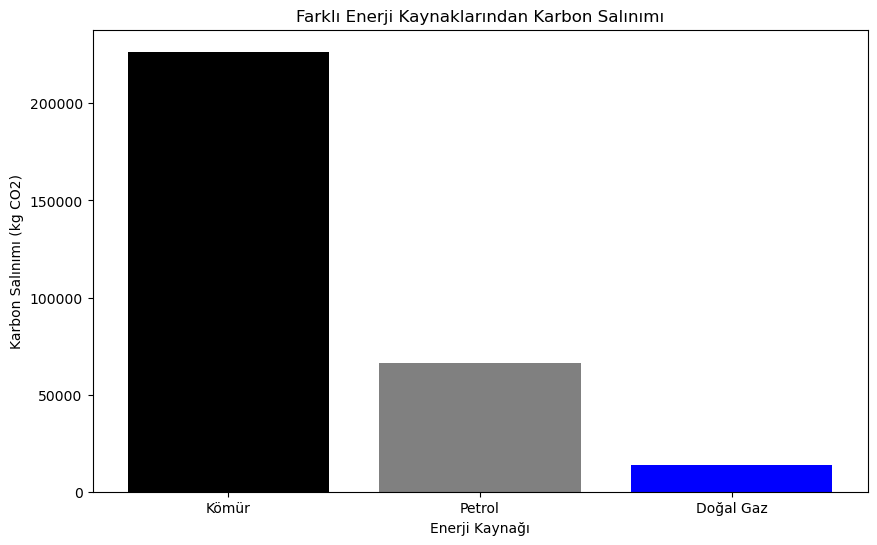

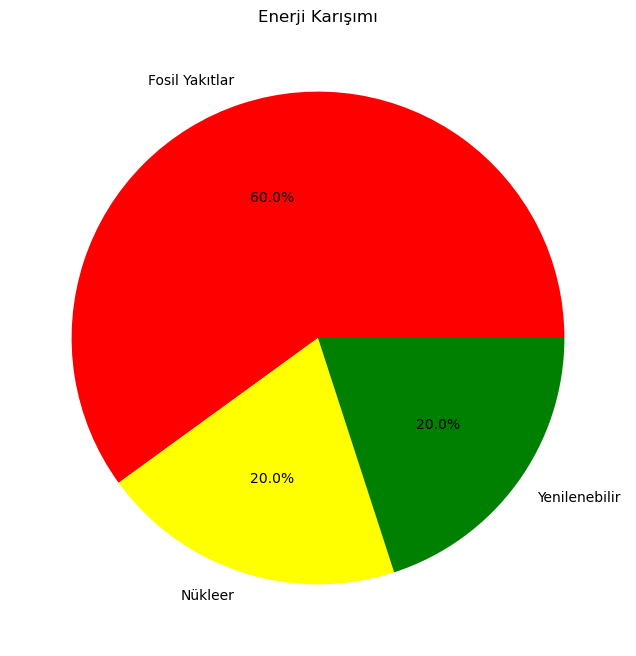

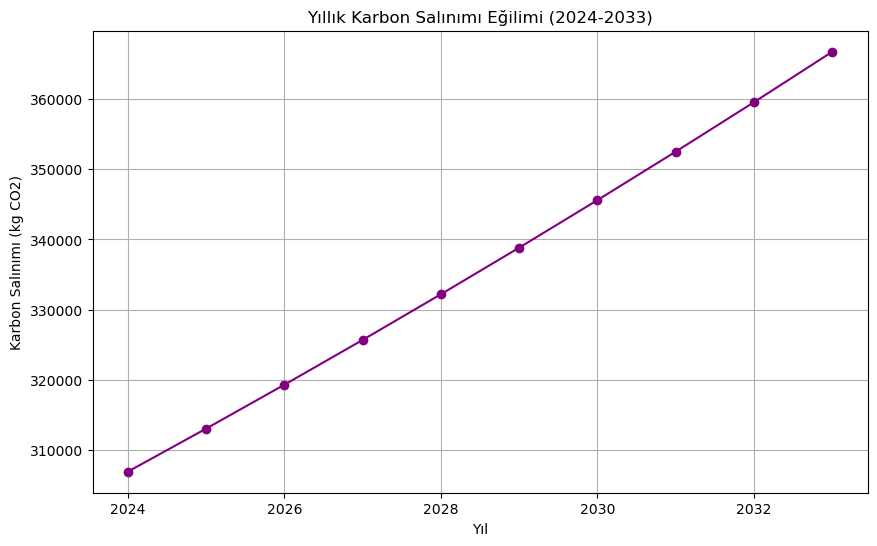

In [5]:
import matplotlib.pyplot as plt

# Veri hazırlığı
enerji_kaynaklari = ['Kömür', 'Petrol', 'Doğal Gaz']
karbon_salimi = [komur_karbon_salini, petrol_karbon_salini, dogal_gaz_karbon_salini]

# Bar grafiği: Karbon Salınımı
plt.figure(figsize=(10, 6))
plt.bar(enerji_kaynaklari, karbon_salimi, color=['black', 'gray', 'blue'])
plt.title('Farklı Enerji Kaynaklarından Karbon Salınımı')
plt.xlabel('Enerji Kaynağı')
plt.ylabel('Karbon Salınımı (kg CO2)')
plt.show()

# Pie grafiği: Enerji Karışımı
enerji_karisimi = [fosil_yakit_orani, nukleer_orani, yenilenebilir_orani]
etiketler = ['Fosil Yakıtlar', 'Nükleer', 'Yenilenebilir']

plt.figure(figsize=(8, 8))
plt.pie(enerji_karisimi, labels=etiketler, autopct='%1.1f%%', colors=['red', 'yellow', 'green'])
plt.title('Enerji Karışımı')
plt.show()

# Çizgi grafiği: Yıllık Karbon Salınımı Eğilimi (10 yıl için varsayım)
yillar = list(range(2024, 2034))
yillik_karbon_salimi = [toplam_karbon_salini * (1.02 ** i) for i in range(10)]  # %2 artış varsayımı

plt.figure(figsize=(10, 6))
plt.plot(yillar, yillik_karbon_salimi, marker='o', linestyle='-', color='purple')
plt.title('Yıllık Karbon Salınımı Eğilimi (2024-2033)')
plt.xlabel('Yıl')
plt.ylabel('Karbon Salınımı (kg CO2)')
plt.grid(True)
plt.show()

In [1]:
file_path = r'C:\Users\hatice\Documents\sms-20240822055432.csv'


In [3]:
import pandas as pd

# Veriyi yükleyin
df = pd.read_csv(file_path)

# İlk birkaç satırı inceleyin
print(df.head())


   _protocol    _address          _date  _type  _subject  \
0          0  IS BANKASI  1612814515935      1       NaN   
1          0  IS BANKASI  1612814542763      1       NaN   
2          0  IS BANKASI  1612854593213      1       NaN   
3          0        9333  1612863622764      1       NaN   
4          0  IS BANKASI  1612943384815      1       NaN   

                                               _body  _toa  _sc_toa  \
0  Maximum Mobil tam sana gore! Kart bilgilerinde...   NaN      NaN   
1  **3388 nolu  kartla WWW.TRENDYOL.COM firmasind...   NaN      NaN   
2  Bankacilik islemlerini mobilden hizlica yapabi...   NaN      NaN   
3  Degerli musterimiz mobil hattinizda yeterli ba...   NaN      NaN   
4  Maximum Mobil tam sana gore! Kart bilgilerinde...   NaN      NaN   

   _service_center  _read  _status  _locked     _date_sent  _sub_id  \
0     9.053291e+11      1       -1        0  1612814512000        1   
1     9.085032e+11      1       -1        0  1612814536000        1   

In [5]:
import pandas as pd

# Dosya yolunu belirtin
file_path = r'C:\Users\hatice\Documents\sms-20240822055432.csv'

# Veriyi yükleyin
df = pd.read_csv(file_path)

# İlk birkaç satırı inceleyin
print(df.head())


   _protocol    _address          _date  _type  _subject  \
0          0  IS BANKASI  1612814515935      1       NaN   
1          0  IS BANKASI  1612814542763      1       NaN   
2          0  IS BANKASI  1612854593213      1       NaN   
3          0        9333  1612863622764      1       NaN   
4          0  IS BANKASI  1612943384815      1       NaN   

                                               _body  _toa  _sc_toa  \
0  Maximum Mobil tam sana gore! Kart bilgilerinde...   NaN      NaN   
1  **3388 nolu  kartla WWW.TRENDYOL.COM firmasind...   NaN      NaN   
2  Bankacilik islemlerini mobilden hizlica yapabi...   NaN      NaN   
3  Degerli musterimiz mobil hattinizda yeterli ba...   NaN      NaN   
4  Maximum Mobil tam sana gore! Kart bilgilerinde...   NaN      NaN   

   _service_center  _read  _status  _locked     _date_sent  _sub_id  \
0     9.053291e+11      1       -1        0  1612814512000        1   
1     9.085032e+11      1       -1        0  1612814536000        1   

In [7]:
# Veri kümenizdeki sütun isimlerini kontrol edin
print(df.columns)


Index(['_protocol', '_address', '_date', '_type', '_subject', '_body', '_toa',
       '_sc_toa', '_service_center', '_read', '_status', '_locked',
       '_date_sent', '_sub_id', '_readable_date', '_contact_name'],
      dtype='object')


In [9]:
# Yeni bir sütun ekleyerek mesajları ham/spam olarak etiketleyelim
df['label'] = df['_body'].apply(lambda x: 'spam' if 'free' in x.lower() or 'win' in x.lower() or 'credit' in x.lower() else 'ham')

# Etiketlerin dağılımını inceleyin
print(df['label'].value_counts())


label
ham     1880
spam       2
Name: count, dtype: int64


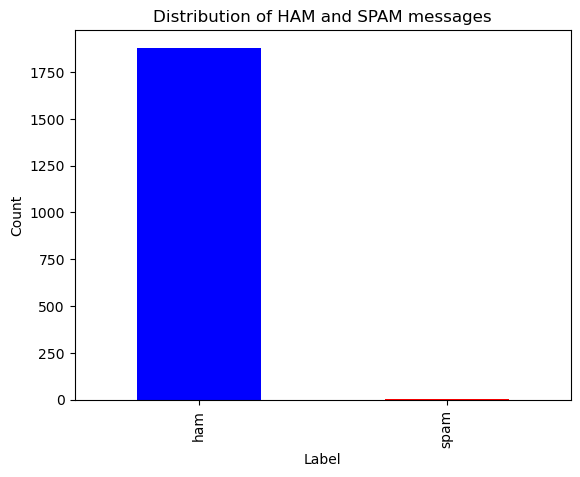

In [11]:
# Etiketlere göre veri kümesini analiz edin
import matplotlib.pyplot as plt

# Etiketlerin dağılımını görselleştirme
df['label'].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title('Distribution of HAM and SPAM messages')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


In [40]:
import pandas as pd

# Veriyi yükleme
file_path = r'C:\Users\hatice\Documents\sms-20240822055432.csv'
 # Yüklediğiniz dosya yolu
df = pd.read_csv(file_path)

# Verinin ilk birkaç satırını görüntüleyin
print(df.head())


   _protocol    _address          _date  _type  _subject  \
0          0  IS BANKASI  1612814515935      1       NaN   
1          0  IS BANKASI  1612814542763      1       NaN   
2          0  IS BANKASI  1612854593213      1       NaN   
3          0        9333  1612863622764      1       NaN   
4          0  IS BANKASI  1612943384815      1       NaN   

                                               _body  _toa  _sc_toa  \
0  Maximum Mobil tam sana gore! Kart bilgilerinde...   NaN      NaN   
1  **3388 nolu  kartla WWW.TRENDYOL.COM firmasind...   NaN      NaN   
2  Bankacilik islemlerini mobilden hizlica yapabi...   NaN      NaN   
3  Degerli musterimiz mobil hattinizda yeterli ba...   NaN      NaN   
4  Maximum Mobil tam sana gore! Kart bilgilerinde...   NaN      NaN   

   _service_center  _read  _status  _locked     _date_sent  _sub_id  \
0     9.053291e+11      1       -1        0  1612814512000        1   
1     9.085032e+11      1       -1        0  1612814536000        1   

In [42]:
# İlgili sütunları seçme ve yeniden adlandırma
df_clean = df[['_body', '_address']].copy()
df_clean.columns = ['message', 'label']

# Örnek bir etiketleme kuralı: 'IS BANKASI' içeren mesajlar 'ham', diğerleri 'spam'
df_clean['label'] = df_clean['label'].apply(lambda x: 'ham' if 'IS BANKASI' in x else 'spam')

# Temizlenen veriyi kontrol etme
print(df_clean.head())


                                             message label
0  Maximum Mobil tam sana gore! Kart bilgilerinde...   ham
1  **3388 nolu  kartla WWW.TRENDYOL.COM firmasind...   ham
2  Bankacilik islemlerini mobilden hizlica yapabi...   ham
3  Degerli musterimiz mobil hattinizda yeterli ba...  spam
4  Maximum Mobil tam sana gore! Kart bilgilerinde...   ham


In [44]:
# 'label' sütunundaki her bir sınıfın sayısını bulma
label_counts = df_clean['label'].value_counts()

# Sonuçları yazdırma
print("Ham mesaj sayısı:", label_counts.get('ham', 0))
print("Spam mesaj sayısı:", label_counts.get('spam', 0))


Ham mesaj sayısı: 164
Spam mesaj sayısı: 1718


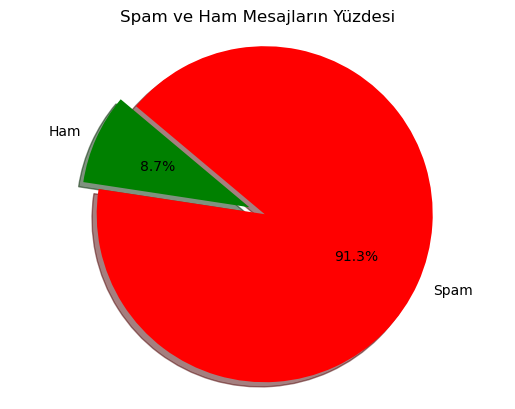

In [46]:
import matplotlib.pyplot as plt

# Yüzde hesaplama
labels = ['Ham', 'Spam']
sizes = [164, 1718]  # Mesaj sayıları
colors = ['green', 'red']
explode = (0.1, 0)  # Spam mesajını vurgulamak için

# Pasta grafiği
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Daireyi düzgün hale getir
plt.title('Spam ve Ham Mesajların Yüzdesi')
plt.show()


In [48]:
# Toplam spam mesajları için enerji tüketimi hesaplama
energy_per_message = 1  # joule
total_spam_messages = 1718
total_energy_spam = total_spam_messages * energy_per_message

# Enerji tüketimini yazdırma
print(f"Toplam enerji tüketimi (joule): {total_energy_spam}")


Toplam enerji tüketimi (joule): 1718


In [50]:
# Bir insanın 42 ayda tükettiği enerji
energy_per_42_months = total_energy_spam * 42

# Dünya genelindeki SMS alabilen insanlar için toplam enerji tüketimi (milyar insan varsayımıyla)
global_population = 8_000_000_000  # 8 milyar insan
total_global_energy = energy_per_42_months * global_population

# Sonuçları tablo olarak yazdırma
import pandas as pd

data = {
    'Zaman': ['42 Ay'],
    'Bir Kişinin Harcadığı Enerji (Joule)': [energy_per_42_months],
    'Dünya Genelinde Toplam Enerji (Joule)': [total_global_energy]
}

df_energy = pd.DataFrame(data)
print(df_energy)


   Zaman  Bir Kişinin Harcadığı Enerji (Joule)  \
0  42 Ay                                 72156   

   Dünya Genelinde Toplam Enerji (Joule)  
0                        577248000000000  


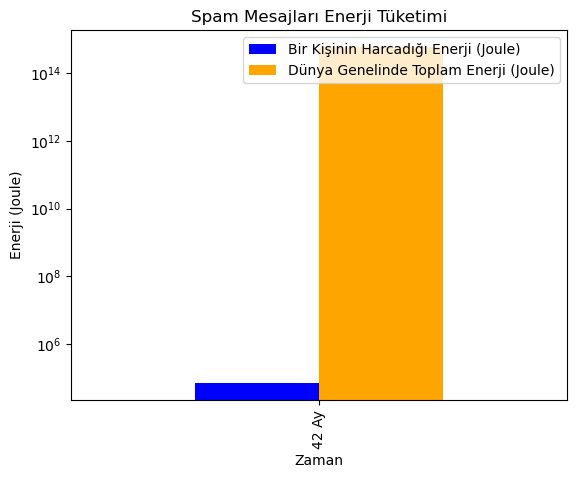

In [52]:
# Bar grafiği oluşturma
df_energy.plot(kind='bar', x='Zaman', y=['Bir Kişinin Harcadığı Enerji (Joule)', 'Dünya Genelinde Toplam Enerji (Joule)'], 
               color=['blue', 'orange'], logy=True)
plt.title('Spam Mesajları Enerji Tüketimi')
plt.ylabel('Enerji (Joule)')
plt.show()


In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# Karbon salınımı hesaplaması için kütüphaneler
import numpy as np


In [56]:
# Verileri manuel olarak tanımlayalım
energy_data = {
    "time": [42],  # Ay
    "individual_energy_joules": [72156],  # Bir kişinin harcadığı enerji (Joule)
    "global_energy_joules": [577248000000000]  # Dünya genelinde toplam enerji (Joule)
}

# Veriyi DataFrame'e dönüştürelim
df = pd.DataFrame(energy_data)

# Enerji verilerini yıla çevirelim
df['years'] = df['time'] / 12  # Ayı yıla çevirme

# Cihazların ortalama enerji tüketimi (Joule cinsinden)
fridge_energy_joule = 150 * 3600 * 24 * 365  # Buzdolabı, ortalama 150 Watt
lightbulb_energy_joule = 60 * 3600 * 24 * 365  # Ampul, ortalama 60 Watt
oven_energy_joule = 2000 * 3600  # Fırın, ortalama 2000 Watt, bir saat çalışma süresi

# Buzdolabı, lamba ve fırın çalışma sürelerini hesaplayalım
df['fridge_years'] = df['individual_energy_joules'] / fridge_energy_joule
df['lightbulb_years'] = df['individual_energy_joules'] / lightbulb_energy_joule
df['oven_hours'] = df['individual_energy_joules'] / oven_energy_joule

# Sonuçları yazdıralım
print(df)


   time  individual_energy_joules  global_energy_joules  years  fridge_years  \
0    42                     72156       577248000000000    3.5      0.000015   

   lightbulb_years  oven_hours  
0         0.000038    0.010022  


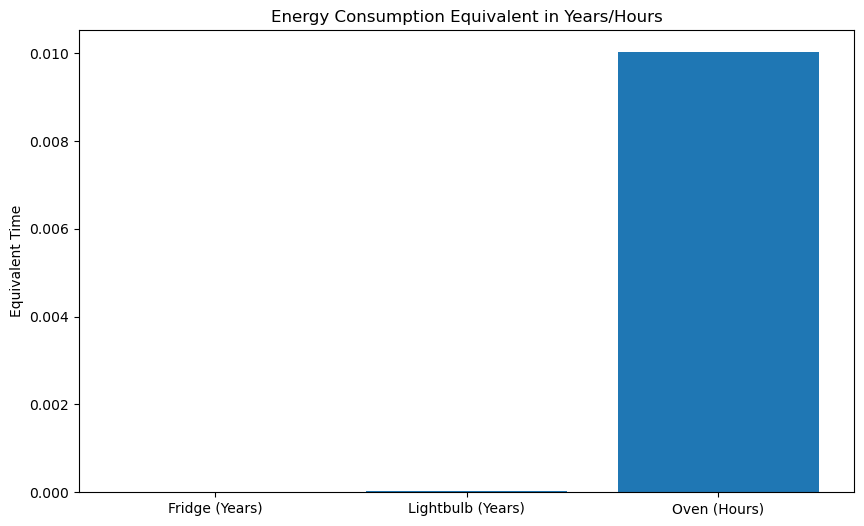

In [58]:
# Grafik oluşturma
plt.figure(figsize=(10, 6))
plt.bar(['Fridge (Years)', 'Lightbulb (Years)', 'Oven (Hours)'], 
        [df['fridge_years'][0], df['lightbulb_years'][0], df['oven_hours'][0]])

plt.title("Energy Consumption Equivalent in Years/Hours")
plt.ylabel("Equivalent Time")
plt.show()


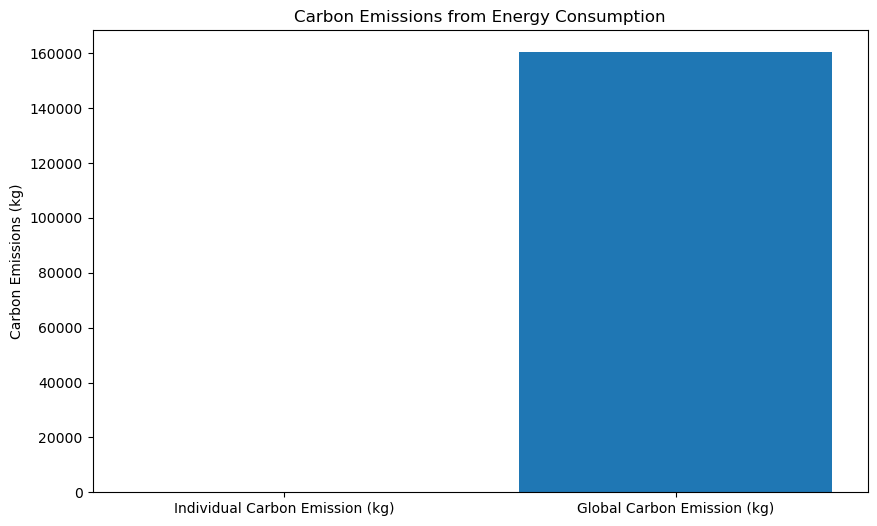

In [60]:
# Karbon salınımı hesaplaması: 1 Joule enerji = 0.00000000027778 kg CO2
carbon_per_joule = 0.00000000027778  # kg CO2 per Joule
df['individual_carbon_kg'] = df['individual_energy_joules'] * carbon_per_joule
df['global_carbon_kg'] = df['global_energy_joules'] * carbon_per_joule

# Karbon salınımı grafik
plt.figure(figsize=(10, 6))
plt.bar(['Individual Carbon Emission (kg)', 'Global Carbon Emission (kg)'], 
        [df['individual_carbon_kg'][0], df['global_carbon_kg'][0]])

plt.title("Carbon Emissions from Energy Consumption")
plt.ylabel("Carbon Emissions (kg)")
plt.show()


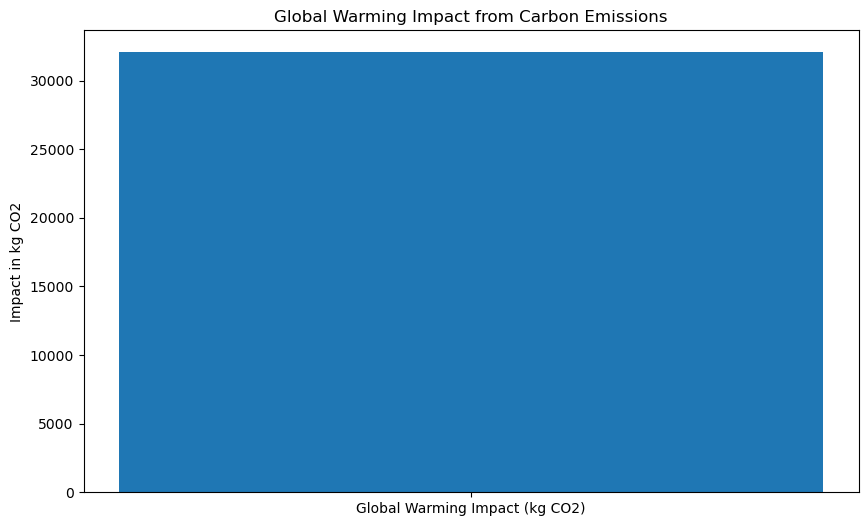

In [62]:
# Küresel ısınmaya etkisi: Küresel ısınmaya etki oranı (örnek olarak %20)
global_warming_impact_percentage = 0.2
df['global_warming_impact'] = df['global_carbon_kg'] * global_warming_impact_percentage

# Küresel ısınma etkisi grafiği
plt.figure(figsize=(10, 6))
plt.bar(['Global Warming Impact (kg CO2)'], [df['global_warming_impact'][0]])

plt.title("Global Warming Impact from Carbon Emissions")
plt.ylabel("Impact in kg CO2")
plt.show()


In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn ayarları
sns.set(style="whitegrid")


In [66]:
# Verileri manuel olarak tanımlayalım
energy_data = {
    "time": [42],  # Ay
    "individual_energy_joules": [72156],  # Bir kişinin harcadığı enerji (Joule)
    "global_energy_joules": [577248000000000]  # Dünya genelinde toplam enerji (Joule)
}

# Veriyi DataFrame'e dönüştürelim
df = pd.DataFrame(energy_data)

# Enerji verilerini yıla çevirelim
df['years'] = df['time'] / 12  # Ayı yıla çevirme

# Cihazların ortalama enerji tüketimi (Joule cinsinden)
fridge_energy_joule = 150 * 3600 * 24 * 365  # Buzdolabı, ortalama 150 Watt
lightbulb_energy_joule = 60 * 3600 * 24 * 365  # Ampul, ortalama 60 Watt
oven_energy_joule = 2000 * 3600  # Fırın, ortalama 2000 Watt, bir saat çalışma süresi

# Buzdolabı, lamba ve fırın çalışma sürelerini hesaplayalım
df['fridge_years'] = df['individual_energy_joules'] / fridge_energy_joule
df['lightbulb_years'] = df['individual_energy_joules'] / lightbulb_energy_joule
df['oven_hours'] = df['individual_energy_joules'] / oven_energy_joule

# Karbon salınımı hesaplaması: 1 Joule enerji = 0.00000000027778 kg CO2
carbon_per_joule = 0.00000000027778  # kg CO2 per Joule
df['individual_carbon_kg'] = df['individual_energy_joules'] * carbon_per_joule
df['global_carbon_kg'] = df['global_energy_joules'] * carbon_per_joule

# Küresel ısınmaya etki oranı (örnek olarak %20)
global_warming_impact_percentage = 0.2
df['global_warming_impact'] = df['global_carbon_kg'] * global_warming_impact_percentage

print(df)


   time  individual_energy_joules  global_energy_joules  years  fridge_years  \
0    42                     72156       577248000000000    3.5      0.000015   

   lightbulb_years  oven_hours  individual_carbon_kg  global_carbon_kg  \
0         0.000038    0.010022               0.00002      160347.94944   

   global_warming_impact  
0           32069.589888  


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


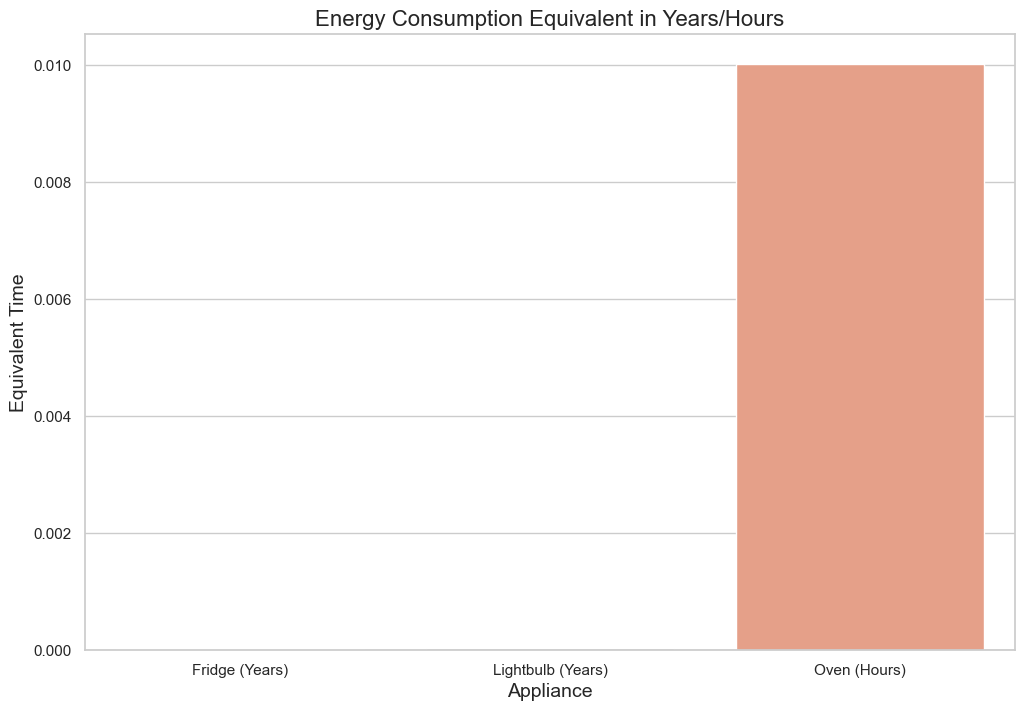

In [68]:
# Enerji tüketimi kıyaslama grafiği
plt.figure(figsize=(12, 8))
sns.barplot(x=['Fridge (Years)', 'Lightbulb (Years)', 'Oven (Hours)'], 
            y=[df['fridge_years'][0], df['lightbulb_years'][0], df['oven_hours'][0]], 
            palette='coolwarm')

plt.title("Energy Consumption Equivalent in Years/Hours", fontsize=16)
plt.ylabel("Equivalent Time", fontsize=14)
plt.xlabel("Appliance", fontsize=14)
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


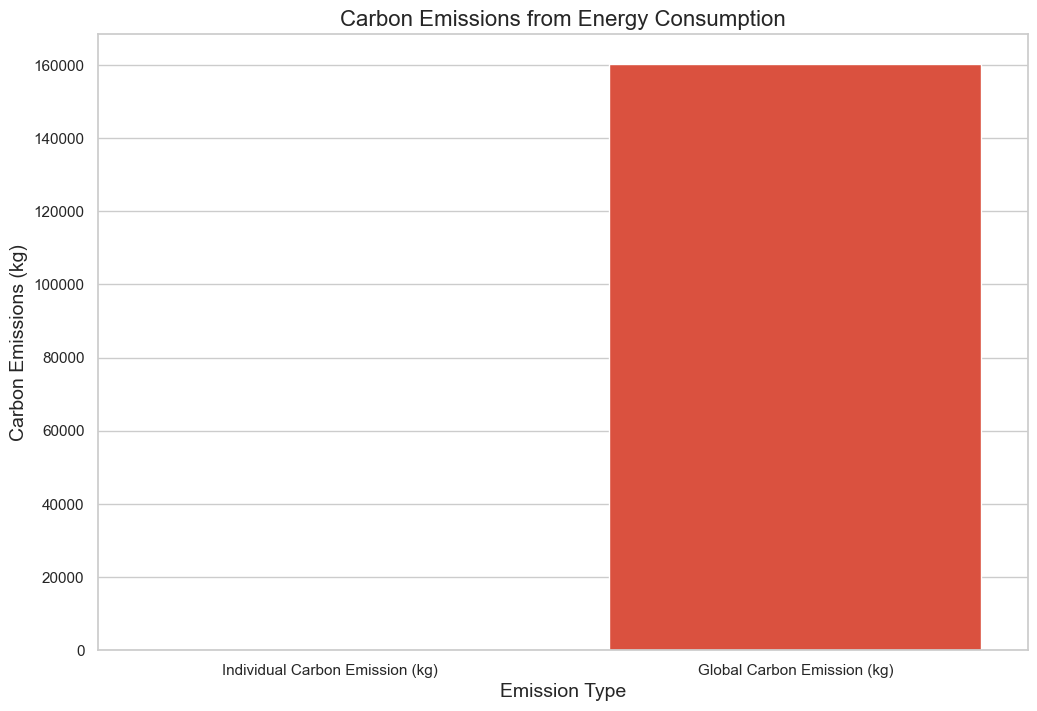

In [71]:
# Karbon salınımı grafiği
plt.figure(figsize=(12, 8))
sns.barplot(x=['Individual Carbon Emission (kg)', 'Global Carbon Emission (kg)'], 
            y=[df['individual_carbon_kg'][0], df['global_carbon_kg'][0]], 
            palette='YlOrRd')

plt.title("Carbon Emissions from Energy Consumption", fontsize=16)
plt.ylabel("Carbon Emissions (kg)", fontsize=14)
plt.xlabel("Emission Type", fontsize=14)
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:645: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  g_vals = grouped_vals.get_group(g)


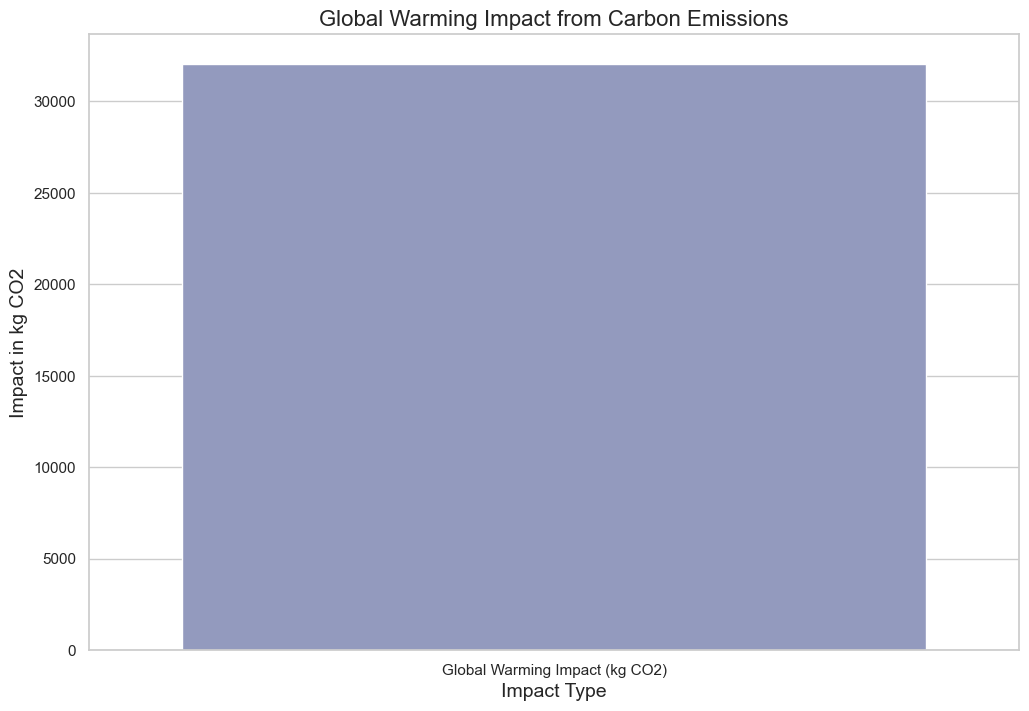

In [73]:
# Küresel ısınma etkisi grafiği
plt.figure(figsize=(12, 8))
sns.barplot(x=['Global Warming Impact (kg CO2)'], 
            y=[df['global_warming_impact'][0]], 
            palette='BuPu')

plt.title("Global Warming Impact from Carbon Emissions", fontsize=16)
plt.ylabel("Impact in kg CO2", fontsize=14)
plt.xlabel("Impact Type", fontsize=14)
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


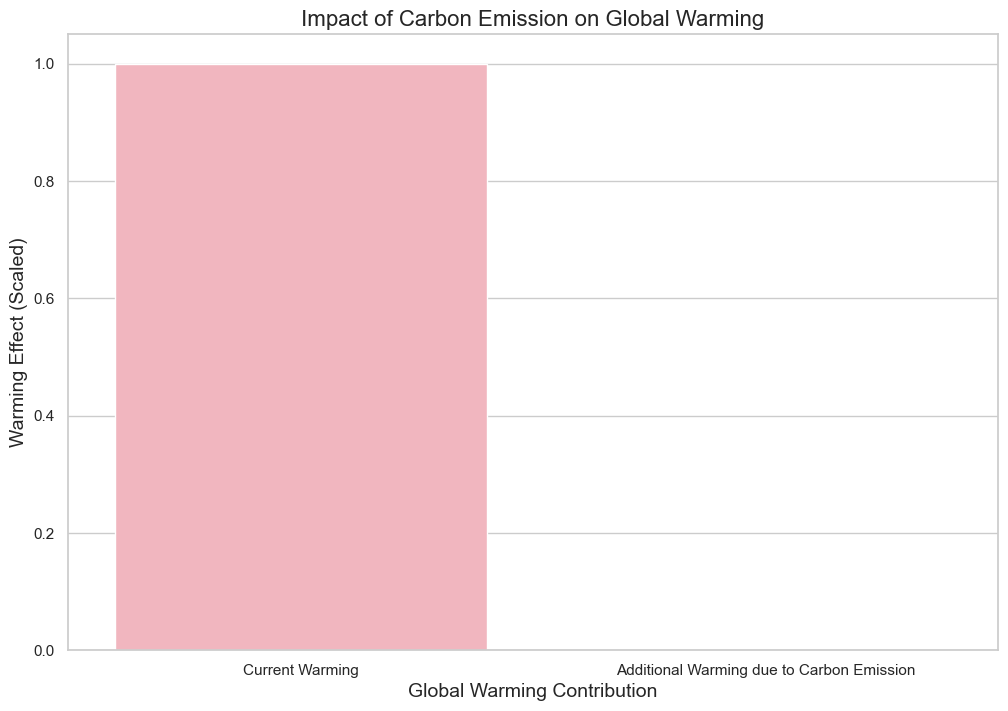

In [75]:
# Karbon salınımının küresel ısınmayı artırması grafiği
plt.figure(figsize=(12, 8))
impact_labels = ['Current Warming', 'Additional Warming due to Carbon Emission']
warming_values = [1, df['global_warming_impact'][0] / 1e12]  # Ölçeklenmiş değerler

sns.barplot(x=impact_labels, y=warming_values, palette='RdPu')

plt.title("Impact of Carbon Emission on Global Warming", fontsize=16)
plt.ylabel("Warming Effect (Scaled)", fontsize=14)
plt.xlabel("Global Warming Contribution", fontsize=14)
plt.show()
